# QDM window size analysis

Comparison of the different window sizes for grouping. 

In [1]:
# config cell
from pathlib import Path
import seaborn as sns
import xarray as xr

# tmp dir for where results have been precomputed
tmp_dir = Path("/center1/CMIP6/kmredilla/downscaling/eda")

In [5]:
ds = xr.open_zarr(tmp_dir.joinpath("qm_window_pridx_cvm_allmodels_historical.zarr"))

### Domain-wide boxplots of 2-sample Cramér–von Mises $p$-values for different window values and indicators

In [ ]:
df = ds.to_dataframe().reset_index()[["model", "window", "dpi_pval", "rx1day_pval"]]

df = df.melt(
    id_vars=["model", "window"],
    value_vars=["rx1day_pval", "dpi_pval"],
    var_name="indicator",
    value_name="pval",
)

df["indicator"] = df["indicator"].str.replace("_pval", "")

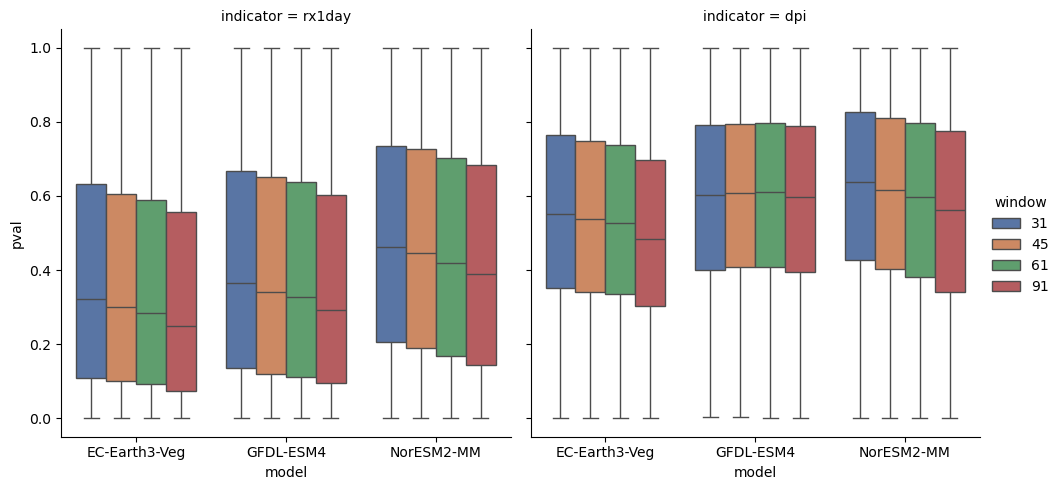

In [9]:
sns.catplot(
    df,
    x="model",
    col="indicator",
    y="pval",
    hue="window",
    kind="box",
    palette="deep",
)